**Discription**

About the data in this data there are 11 columns and 10682 rows which are sorted and valuaed in this dataset. So Starting with columns, lets describe the columns data.

1 - **Airline**: Unique airline companies

2 - **Date of Journey**: Date of journey

3 - **Source**: Starting journey City.

4 - **Destination**: Final destination of the city.

5 - **Route**: Route

6 - **Dep_Time**: Time when flight started its journey.

7 - **Arrival_Time**: Time when flight landed

8 - **Duration**: Total time of the journey

9 - **Total_Stops**: Total number of stops during the journey

10 - **Additional_Info**: Information regarding meals etc.

11 - **Price**: Total cost of the journey

**Libraries Import**

In [1]:
# Numpy 
import numpy as np

# Pandas
import pandas as pd

# Matplotlib 
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns


# Warnings
import warnings 
warnings.filterwarnings('ignore')

**Load DataSet**

In [2]:
# Dataset Load
df = pd.read_excel('/content/drive/MyDrive/iNeuron ML Project/Flight Price Prediction/Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# **Exploratory Data Analysis**

In [3]:
#displaying first five records in our train dataset

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#displaying the last 5 records

df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


**As you can see here, the Price Nan values at the last records have NULL values. This is because of the test dataset after combining both files which is okay**

In [5]:
#checking for missing values in our final dataset 

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**The columns 'Total_stops' and 'Route' has as one null value each which needs to be handled**

In [6]:
#information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Help us to understand how data has been spread across the table.
# Count :- The number of Non-empty rows in a feature.
# mean :- mean value of that feature.
# std :- standard deviation values of that feature.
# min :- minimum values of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% the percentile/quartile of each features.

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# **Data Visualization**

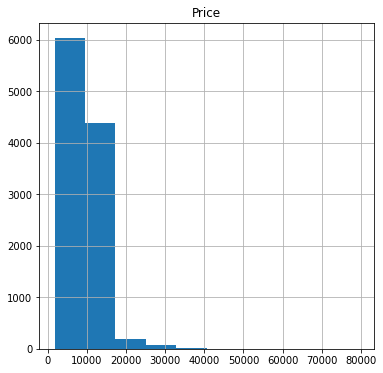

In [8]:
# Histogram of each feature
df.hist(figsize=(6,6))
plt.show()

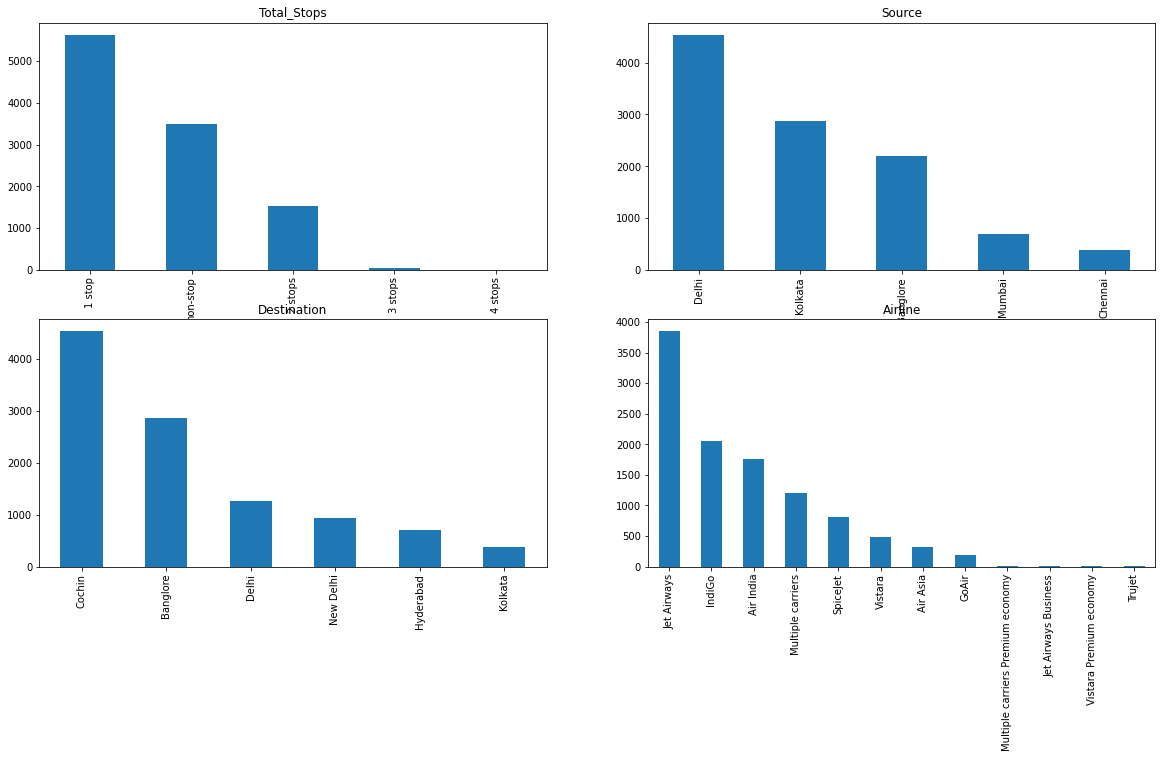

In [9]:
plt.figure(1) 
plt.subplot(221) 
df['Total_Stops'].value_counts(normalize=False).plot.bar(title= 'Total_Stops') 
plt.subplot(222) 
df['Source'].value_counts(normalize=False).plot.bar(title= 'Source') 
plt.subplot(223) 
df['Destination'].value_counts(normalize=False).plot.bar(title= 'Destination') 
plt.subplot(224) 
df['Airline'].value_counts(normalize=False).plot.bar(figsize=(20,10), title= 'Airline') 

plt.show()



Our observations are:-

- Most flights have 1 stops
- Most flight are departed from Delhi
- Most flights are arrived at cochin
- Most flights are from Jet Airways.

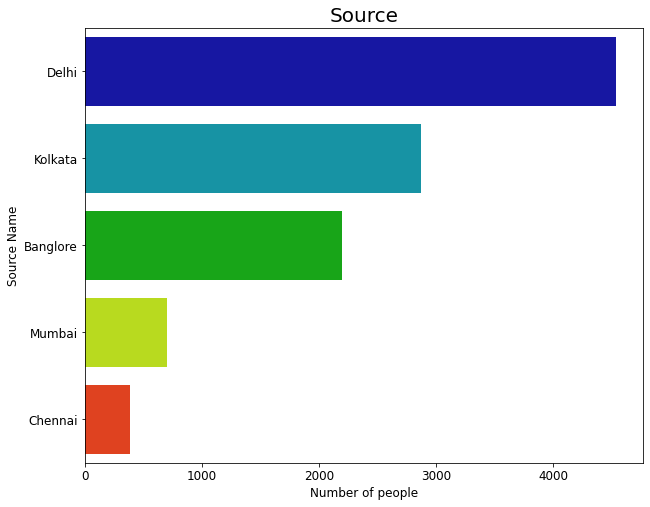

In [10]:
# Source 

plt.figure(figsize=(10,8))

Source = df["Source"].value_counts()
sns.barplot(Source.values, Source.index, palette='nipy_spectral')
plt.title('Source',size=20)
plt.xlabel('Number of people',size=12)
plt.ylabel('Source Name',size=12)
plt.tick_params(labelsize=12)
plt.show()

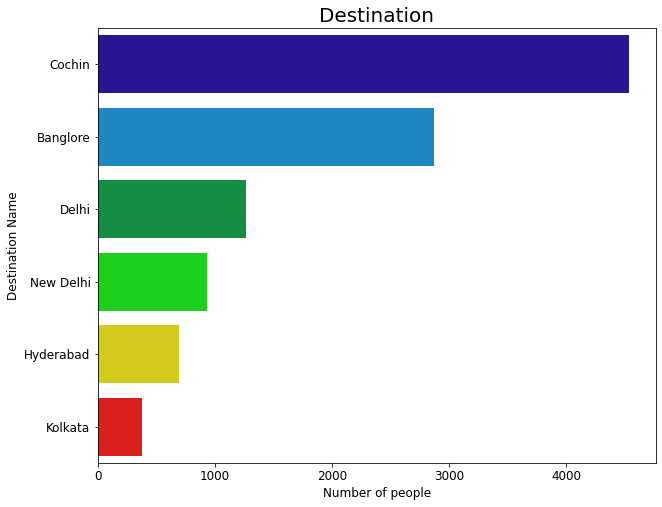

In [11]:
# Destination 

plt.figure(figsize=(10,8))

Source = df["Destination"].value_counts()
sns.barplot(Source.values, Source.index, palette='nipy_spectral')
plt.title('Destination',size=20)
plt.xlabel('Number of people',size=12)
plt.ylabel('Destination Name',size=12)
plt.tick_params(labelsize=12)
plt.show()

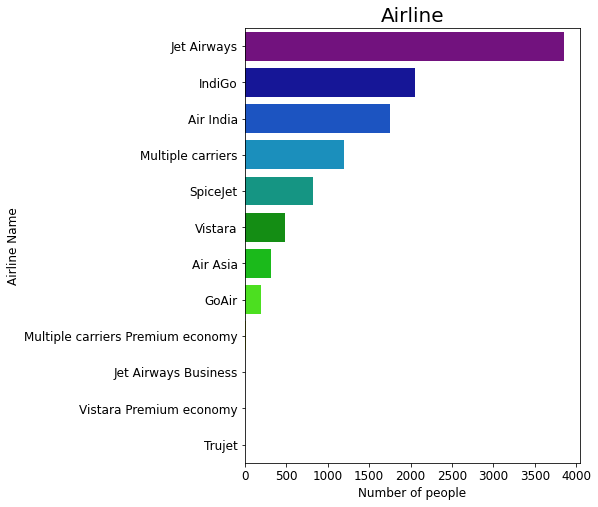

In [12]:
# Airline 

plt.figure(figsize=(6,8))

Source = df["Airline"].value_counts()
sns.barplot(Source.values, Source.index, palette='nipy_spectral')
plt.title('Airline',size=20)
plt.xlabel('Number of people',size=12)
plt.ylabel('Airline Name',size=12)
plt.tick_params(labelsize=12)
plt.show()

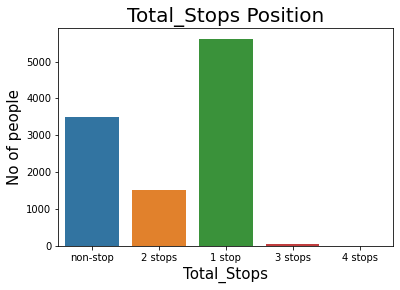

In [13]:
# Total_Stops ....
sns.countplot('Total_Stops',data=df)
df['Total_Stops'].value_counts()
plt.title('Total_Stops Position',size=20)
plt.xlabel('Total_Stops',size=15)
plt.ylabel('No of people',size=15)
plt.show()

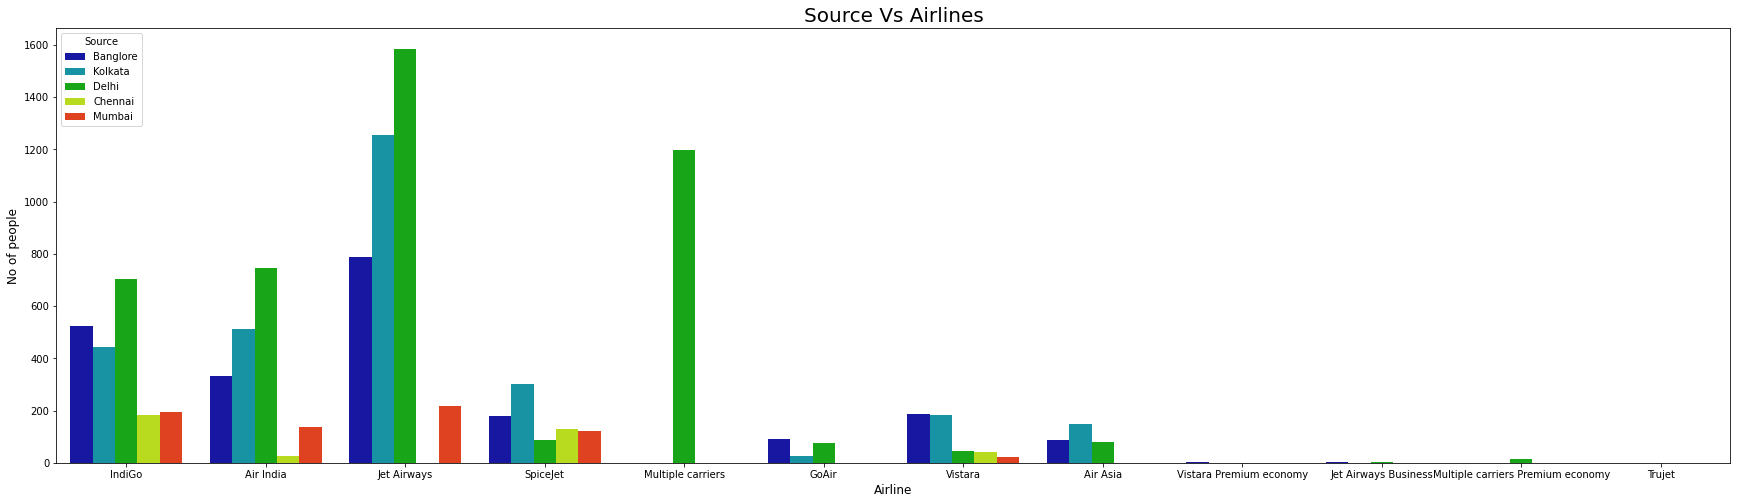

In [14]:
# Source Vs Airlines

plt.figure(figsize=(30,8))
sns.countplot(data = df, x = 'Airline', hue="Source", palette = 'nipy_spectral')
plt.title('Source Vs Airlines',size=20)
plt.xlabel("Airline", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
# plt.ylim(0,20000) 
plt.show()

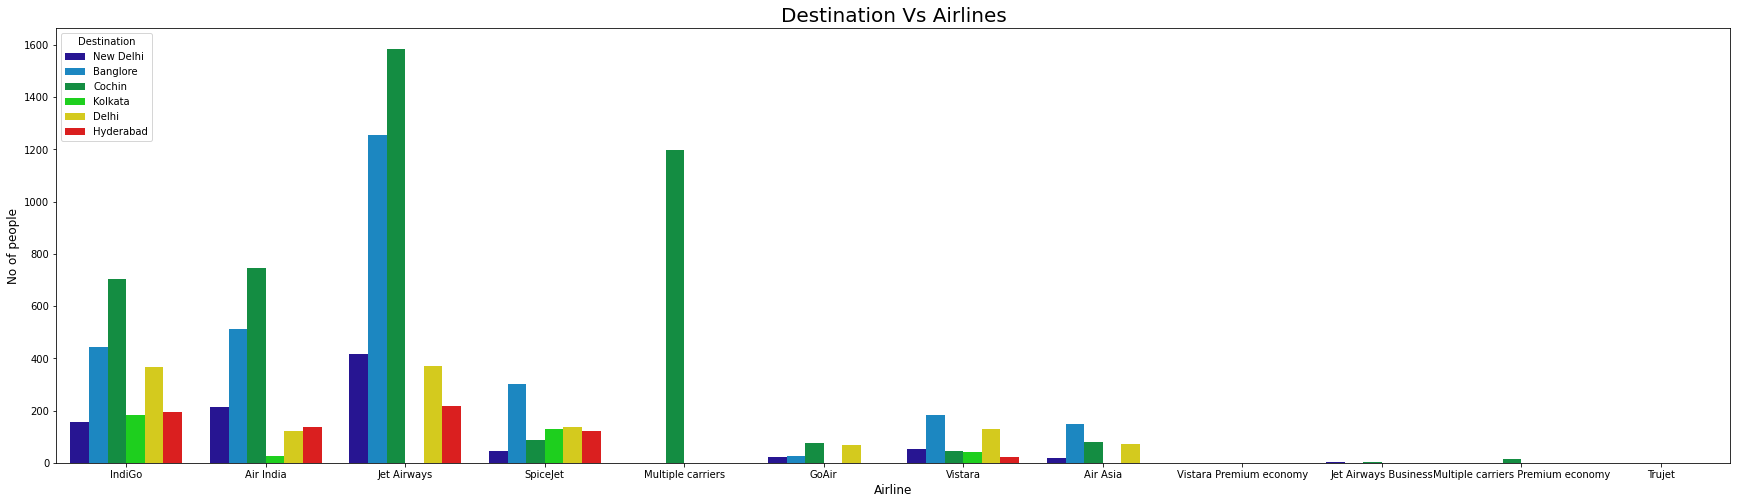

In [15]:
# Destination Vs Airlines

plt.figure(figsize=(30,8))
sns.countplot(data = df, x = 'Airline', hue="Destination", palette = 'nipy_spectral')
plt.title('Destination Vs Airlines',size=20)
plt.xlabel("Airline", fontsize= 12)
plt.ylabel("No of people", fontsize= 12)
# plt.ylim(0,20000) 
plt.show()

**Based on occupation**

In [16]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [17]:
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [18]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

# **FEATURE ENGINEERING**

**1. HANDLING NUMERICAL FEATURES**

In [19]:
#displaying first five records in our train dataset

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**1. DATE OF JOURNEY**

As you can see here, the 'Date_of_Journey' is in the standard format. So, Let us first split our 'Date of Journey' into a date,month and year as derived features into separate fields & then drop this column (which would no longer be necessary)

In [20]:
#deriving features fro Date of Journey - Splitting by using '/'


df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]


In [21]:
#displaying the first 5 records to check


df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


**The Date, Month and Year is created as separate fields in the dataset**

In [22]:
#conversion of those fields to integer data type

df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)


In [23]:
#displaying info to check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [24]:
#drop 'Date of Journey' column which is no longer required

df.drop(columns='Date_of_Journey',axis=1,inplace=True)

**2. DEPARTURE TIME**
- Let us do some Feature Engineering on the 'Departure Time' column - As you can see here, it is in the HH:MM format. So let us split that column into Hours and Minutes and create a separate column for each

In [25]:
#displaying all the values in that column

df['Dep_Time'].str.split(' ').str[0]


0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [26]:
#let us split - and take out the hour and minutes from the 'Dep_Time' and form 2 new columns

df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

In [27]:
#displaying first 5 records to check if new column is created
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [28]:
#conversion of the new columns' datatypes to int type

df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)

In [29]:
#dropping unwanted 'Dep_Time' column now , since it is no longer necessary


df.drop('Dep_Time',axis=1,inplace=True)

In [30]:
df.drop(columns='Arrival_Time',axis=1,inplace=True)

**3. TOTAL STOPS**

In [31]:
# Displaying dataset

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50


**As you can see in the dataset, the 'Total_Stops' column displays the total number od stops for each journey between the departure and arrival times- no stops, 1 stop , 2 stops and so on.**

In [32]:
# Number of types of total stops column

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

There are 6 different values (including non stops and also missing values). These can be mapped using MAPPING FUNCTION

**MAP FUNCTION**

In [33]:
#displaying missing value

df['Total_Stops'].isnull().sum()

1

In [34]:
#using mapping function

df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

Mapping function is used to map every number of stops to the respective numberrs while replacing the missing value by 1

In [35]:
df['Total_Stops'].fillna(df['Total_Stops'].median(),inplace=True)

In [36]:
#displaying final dataset

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,16,50


In [37]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Hour           0
Dep_Minute         0
dtype: int64

In [38]:
#now route becomes an unwanted column, hence dropping column

df.drop('Route',axis=1,inplace=True)

In [39]:
#final result

df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0.0,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,2h 35m,0.0,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,3h,0.0,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,0.0,No info,12648,1,3,2019,11,30


**DURATION**

In [40]:
#displaying datset

df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,16,50


**Let us convert the 'Duration' that consists of both hours and mins to one new column containing hours value alone**

In [41]:
#Let us convert duration into hours

df['duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [42]:
#conversion of the new column datatype to integer

# df['duration_hour'].astype(int)

**Throws error saying there is a '5m' - 5minute feature even after conversion only consisting of hours.This is an error, hence this needs to be handled.Let us check how many records have this error**

In [43]:
#number of records with 5m as hour

df[df['duration_hour'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,3,2019,16,50,5m


**There arejust 1 records with '5m' as hours. Since there are only 1, let us drop these 1 columns and continue**

In [44]:
#dropping that 5m record - which is an error


df.drop(6474,axis=0,inplace=True)


In [45]:
#checking if drop was succesful

df[df['duration_hour'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour


**There are no records now with '5m' as the hours, hence the dropping of columns was successful. Let us proceed with the type conversion to integer for our new created column**

In [46]:
#changing data type of the new column to integer

df['duration_hour'] = df['duration_hour'].astype(int)

In [47]:
#dropping the unwanted column 'Duration' which is no longer required

df.drop('Duration',axis=1,inplace=True)

In [48]:
#checking if the datatypes have been successfully changed to integer

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10682 non-null  float64
 4   Additional_Info  10682 non-null  object 
 5   Price            10682 non-null  int64  
 6   Date             10682 non-null  int64  
 7   Month            10682 non-null  int64  
 8   Year             10682 non-null  int64  
 9   Dep_Hour         10682 non-null  int64  
 10  Dep_Minute       10682 non-null  int64  
 11  duration_hour    10682 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB


As you can see, the type conversion of the column was successful|

In [49]:
# Displaying the final result

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9,25,19
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,18,5,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,16,50,4


**2. HANDLING CATEGORICAL FEATURES**

In [50]:
#dispalying dataset

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,5,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,9,25,19
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,18,5,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,16,50,4


**There are 4 categorical features- ''Airline', 'Source', 'Destination' and 'Additional_Info'. These can be handled by ENCODING TECHNIQUES**

**Checking the number of types in each of these categorical features**

In [51]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [52]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [53]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [54]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

## **LABEL ENCODING**

In [55]:
# Import label encoding library

from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
for col in df.columns:
  if df[col].dtype=='object':
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [58]:
# for col in df.columns:
#   if df[col].dtype=='float64':
#     le=LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(float64))

In [59]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour
0,3,0,5,0.0,8,3897,24,3,2019,22,20,2
1,1,3,0,2.0,8,7662,1,5,2019,5,50,7
2,4,2,1,2.0,8,13882,9,6,2019,9,25,19
3,3,3,0,1.0,8,6218,12,5,2019,18,5,5
4,3,0,5,1.0,8,13302,1,3,2019,16,50,4


In [60]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Dep_Hour', 'Dep_Minute',
       'duration_hour'],
      dtype='object')

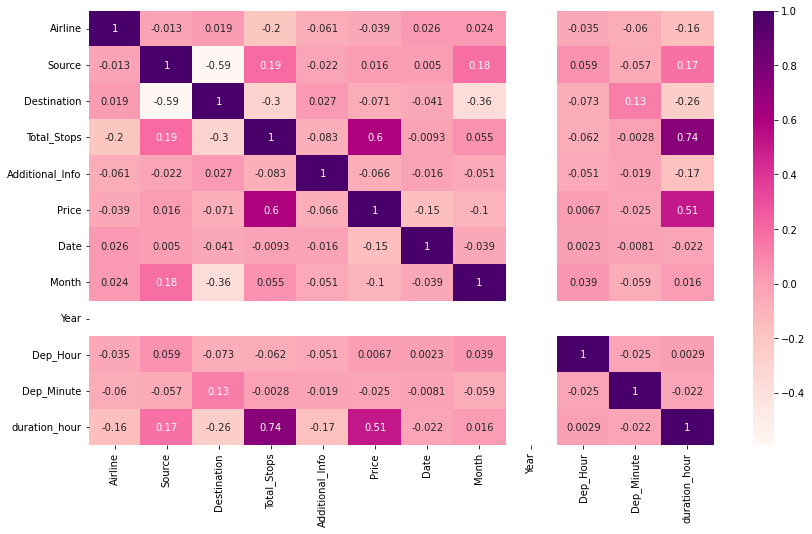

In [61]:

# Analysis relationships between variables
corrmat=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corrmat,cmap='RdPu', annot=True)
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  int64  
 1   Source           10682 non-null  int64  
 2   Destination      10682 non-null  int64  
 3   Total_Stops      10682 non-null  float64
 4   Additional_Info  10682 non-null  int64  
 5   Price            10682 non-null  int64  
 6   Date             10682 non-null  int64  
 7   Month            10682 non-null  int64  
 8   Year             10682 non-null  int64  
 9   Dep_Hour         10682 non-null  int64  
 10  Dep_Minute       10682 non-null  int64  
 11  duration_hour    10682 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.1 MB


## **Split The Data Frame into X & y**

In [63]:
target_name = 'Price'

# Separate object for target feature
y = df[target_name]

# Separate object for input feature
X = df.drop(target_name,axis=1)

In [64]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour
0,3,0,5,0.0,8,24,3,2019,22,20,2
1,1,3,0,2.0,8,1,5,2019,5,50,7
2,4,2,1,2.0,8,9,6,2019,9,25,19
3,3,3,0,1.0,8,12,5,2019,18,5,5
4,3,0,5,1.0,8,1,3,2019,16,50,4


In [65]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# **Apply Feature Scaling**

In [66]:
# Import Feature Scaling Library
from sklearn.preprocessing import StandardScaler


In [67]:
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# **spliting Train & Test Data**

In [68]:
# Import Train & Test data Library
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [70]:
# Train data shape
X_train.shape, y_train.shape

((8545, 11), (8545,))

In [71]:
# Test data shape
X_test.shape, y_test.shape

((2137, 11), (2137,))

In [72]:
X_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Dep_Hour,Dep_Minute,duration_hour
10005,6,2,1,1.0,8,27,5,2019,8,30,10
3684,4,2,1,1.0,5,9,5,2019,11,30,25
1034,8,2,1,1.0,8,24,4,2019,15,45,6
3909,6,2,1,1.0,8,21,3,2019,12,50,12
3088,1,2,1,2.0,8,24,6,2019,17,15,26
...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,1.0,8,27,3,2019,9,0,19
5191,4,3,0,1.0,5,9,5,2019,14,5,6
5390,6,2,1,1.0,8,15,5,2019,12,50,12
860,3,0,5,0.0,8,3,3,2019,0,40,2


In [73]:
y_train

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7271      5678
Name: Price, Length: 8545, dtype: int64

# **MACHINE LEARNING ALGORITHM'S**

In [76]:
# Import accuracy test library
from sklearn.metrics import accuracy_score

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# import classification report
from sklearn.metrics import classification_report

# **kNeighborsClassifier(KNN) using grid search cv**

In [101]:
# import sklearn KNeighborsClassifier(KNN) and grid search cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [102]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [103]:
print("best_estimator result :-",grid_search.best_estimator_)
print("best_params result :-",grid_search.best_params_)

best_estimator result :- KNeighborsClassifier(n_neighbors=1)
best_params result :- {'n_neighbors': 1}


In [104]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred_train=knn.predict(X_train) 
accuracy_1 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy_1)

y_pred_test=knn.predict(X_test) 
accuracy_1 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_1)

Accuracy for train data : 0.9652428320655354
Accuracy for test data : 0.9555451567618156


## **Navie-Bayes Algorithm**

In [74]:
# import sklearn naive_bayes 
from sklearn.naive_bayes import GaussianNB

In [82]:
gnb = GaussianNB(var_smoothing=0.1)
y_pred = gnb.fit(X_train,y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
accuracy_2 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_2)

y_pred_test = gnb.predict(X_test)
accuracy_2 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_2)

Accuracy for train data Result : 0.09151550614394383
Accuracy for test data Result : 0.07767898923724847


# **Decision Tree Algrithm using grid search cv**

In [84]:
# import sklearn Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [86]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [88]:
dici_class = DecisionTreeClassifier(max_depth=9,random_state=1024,max_features='auto',ccp_alpha=0.001,criterion='entropy')
y_pred = dici_class.fit(X_train,y_train)

y_pred_train = dici_class.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy)

y_pred_test = dici_class.predict(X_test)
accuracy_4 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_4)

Accuracy for train data Result : 0.3551784669397308
Accuracy for test data Result : 0.2915301824988301


# **Random Forest Machine Learning Algorithmt**

In [89]:
# Import RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [96]:
random = RandomForestClassifier(n_estimators= 80)
y_pred = random.fit(X_train, y_train).predict(X_test)

y_pred_train = random.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy)

y_pred_test = random.predict(X_test)
accuracy_5 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_5)

Accuracy for train data : 0.9706260971328262
Accuracy for test data : 0.5255030416471689


## **Support vector machine Algorithm (SVM)**

In [97]:
# import svm algorithm
from sklearn import svm

In [98]:
clf = svm.SVC(kernel='linear',degree=3)

y_pred = clf.fit(X_train,y_train).predict(X_test)

In [99]:
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = clf.predict(X_test)
accuracy_6 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_6)

Accuracy for train data :  0.7254534815681685
Accuracy for test data :  0.4613944782405241


**Comparison**

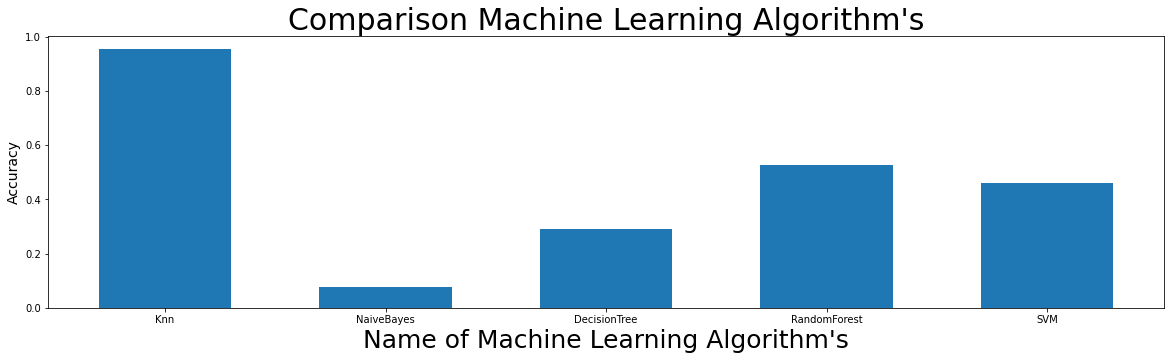

In [105]:
#Lastly we have represented the optimal accuracy by comparing of all the algorithms applying the bar diagram

x = np.array(["Knn", "NaiveBayes",  "DecisionTree","RandomForest","SVM"])
y = np.array([accuracy_1, accuracy_2,accuracy_4,accuracy_5,accuracy_6])
plt.figure(figsize=(20,5))
plt.bar(x,y,width = 0.6)
plt.title("Comparison Machine Learning Algorithm's",size=30)
plt.xlabel("Name of Machine Learning Algorithm's",size=25)
plt.ylabel("Accuracy",size=14)
plt.show()